In [ ]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
# !pip install transformers requests beautifulsoup4 pandas numpy

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import pandas

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert')

Ignore these tokens = tokenizer... lines, they are just for testing

In [ ]:
tokens = tokenizer.encode('The stock is rallying due to surge in the Sensex.', return_tensors='pt')

In [ ]:
tokens = tokenizer.encode('Terrible Stock with low yields. The recession is negatively affecting the returns.', return_tensors='pt')

In [ ]:
tokens = tokenizer.encode('Very good performaning rising gaining stock', return_tensors='pt')

In [ ]:
tokens = tokenizer.encode('This felt terrific. Truly spectacular.', return_tensors = 'pt')

In [ ]:
tokens = tokenizer.encode('Terrible. Aweful. What a waste. This is a bad stock', return_tensors = 'pt')

In [ ]:
tokens = tokenizer.encode('Okay Okay. Medium Performace. Not good not bad.', return_tensors = 'pt')

In [ ]:
tokens = tokenizer.encode('Neutral Bad', return_tensors = 'pt')

In [ ]:
tokens = tokenizer.encode('What an underperforming asset.', return_tensors='pt')

Reading the csv files using pandas

In [ ]:
df = pandas.read_csv('apple-twitter-sentiment-texts.csv')

In [ ]:
df = pandas.read_csv('dataforproject.csv')

In [ ]:
df = pandas.read_csv('30.csv')

For checking if correct csv file opened or not

In [ ]:
df.shape

(246, 13)

No need to run these few lines given below. Just for previewing the csv file

In [ ]:
df.head()

In [ ]:
df.sample

In [ ]:
df['text'].head

In [ ]:
df['Content'].head

In [ ]:
df.iloc[5]

In [ ]:
df['Content'].iloc[500]

Function for tokenization and calculating the sentiment score.

In [ ]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

Ignore this function

In [ ]:
def map_sentiment(rating):
  if (rating < 3):
    return int(-1)
  elif (rating == 3):
    return int(0)
  else:
    return int(1)

This one is correct

In [ ]:
def map_sentiment(rating):
  if (rating == 1):
    return int(1)
  elif (rating == 2):
    return int(-1)
  else:
    return int(0)

Ignore, just for testing

In [ ]:
map_sentiment(sentiment_score(df['text'].iloc[2]))

In [ ]:
map_sentiment(sentiment_score(df['Content'].iloc[500]))

In [ ]:
map_sentiment(sentiment_score('completely bullish for tomorrow. my prediction says a strong upside move can come. I might be wrong but wont short anything tomorrow. dont carry anything over night. #nifty #nifty50 #banknifty #StockMarket'))

In [ ]:
map_sentiment(sentiment_score('good stock'))

In [ ]:
map_sentiment(sentiment_score('Terrible Mistake. Bad Show. Poor Review. Wastage. Aweful'))

Ignore this as well

In [ ]:
df['Content'] = df['Content'].astype(str)

In [ ]:
df['prediction'] = df['text'].apply(lambda x: map_sentiment(sentiment_score(x[:512])))

Ignore this

In [ ]:
df['prediction'][500] = 'okay'

In [ ]:
df.head()

In [ ]:
df

Cleaning the data.
Deleting tweets with no text data.
Also deleting tweets with no likes

In [ ]:
df = df.dropna(subset=['Content'])

In [ ]:
df.drop(df[df['Likes'] > 0].index, inplace=True)

To see how much data left after some tweets deleted

In [ ]:
df.shape

(109, 13)

For each tweet (row in csv file), a prediction (sentiment) must be calculated. So a prediction column is being created to be filled with sentiment prediction from Tweet's content column.

In [ ]:
df['prediction'] = df['Content'].apply(lambda x: map_sentiment(sentiment_score(x[:512])))

Ignore

In [ ]:
(df['Content'].iloc[2])

This is the real result. It shows number of tweets with neutral, negative and positive sentiment.

In [ ]:
df['prediction'].value_counts()

 0    95
-1    10
 1     4
Name: prediction, dtype: int64

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import lag_plot
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [9]:
from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
import  statsmodels.tsa.stattools as sts

import statsmodels.tsa.api as smt

In [5]:
from pandas_datareader import data as pdr

import yfinance as yfin
yfin.pdr_override()



data = pdr.get_data_yahoo("^NSEI", start="2020-1-1", end="2020-05-01")
data.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [12]:


train_data, test_data = data[0:-73], data[-73:]
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

In [13]:
returns.head()

,Log Return Rate
Date,
2020-01-02,-0.000295
2020-01-03,0.005115
2020-01-06,-0.007408
2020-01-07,-0.007547
2020-01-08,-0.011658


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


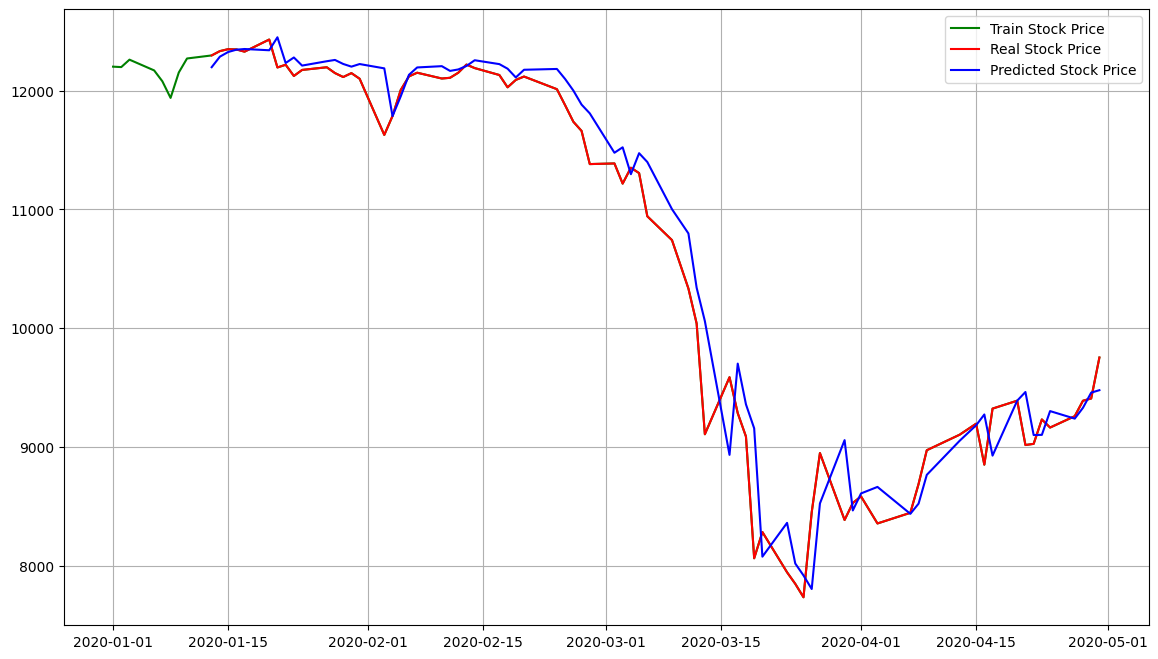

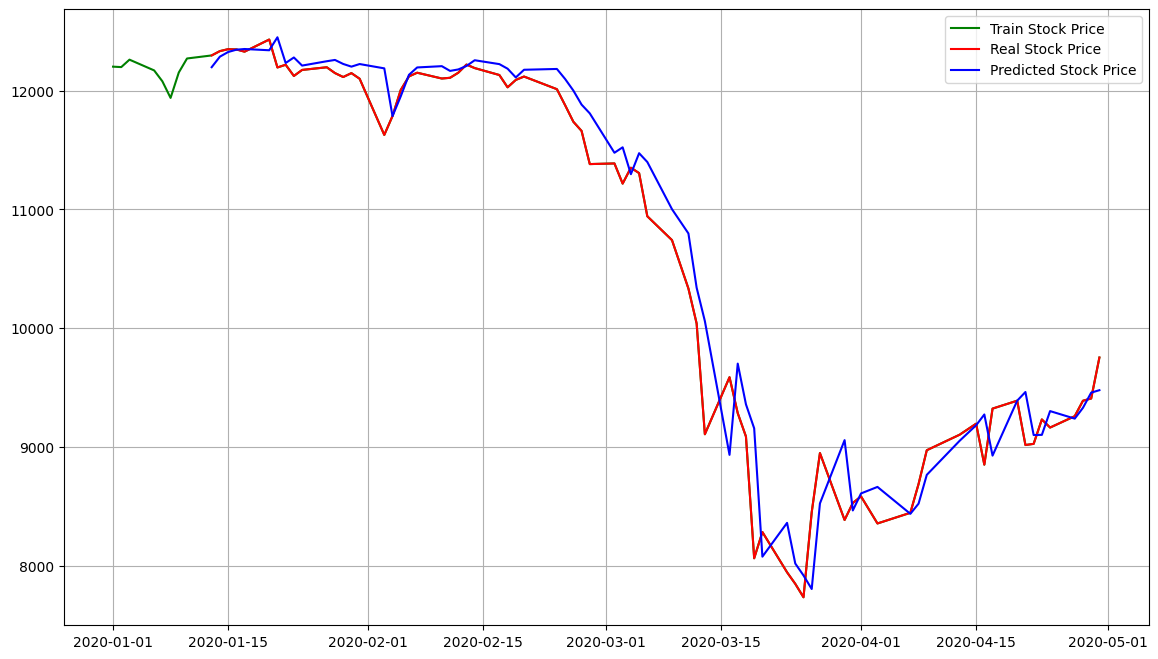

MSE: 89903.03061560671
MAE: 203.10278168336382
RMSE: 299.8383408031847


In [21]:
train_ma = train_data['Open']
test_ma = test_data['Open']

history = [x for x in train_ma]
y = test_ma
predictions = list()

model_fit = smt.ARIMA(history, order=(1,0,1)).fit()

yhat = model_fit.forecast()[0]

predictions.append(yhat)
history.append(y[0])

for i in range(1, len(y)):
    model_fit = smt.ARIMA(history, order=(1,0,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat+50)
    obs = y[i]
    history.append(obs)


plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()


print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

<Figure size 1850x1050 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

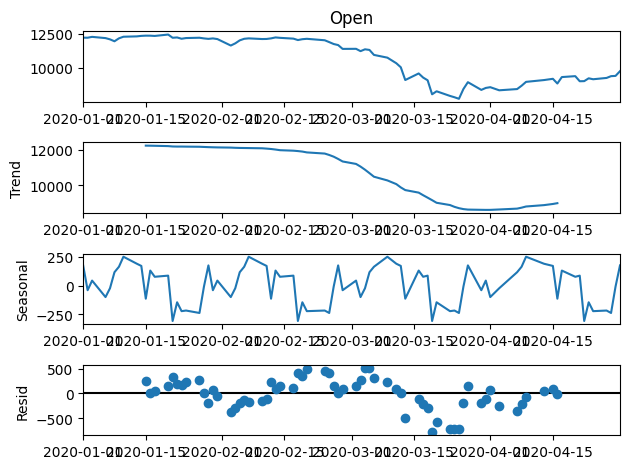

In [24]:

data_arima = data['Open']
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
decomposition = seasonal_decompose(data_arima[-1000:], model='additive', period = 20)
plt.figure(figsize=(20,10))
fig = decomposition.plot()
plt.show()
     

In [37]:

trend = decomposition.trend
sea=decomposition.seasonal



81

In [38]:

train_trend, test_trend = trend[0:-33], trend[-33:]
train_sea, test_sea = sea[0:-33], sea[-33:]



48

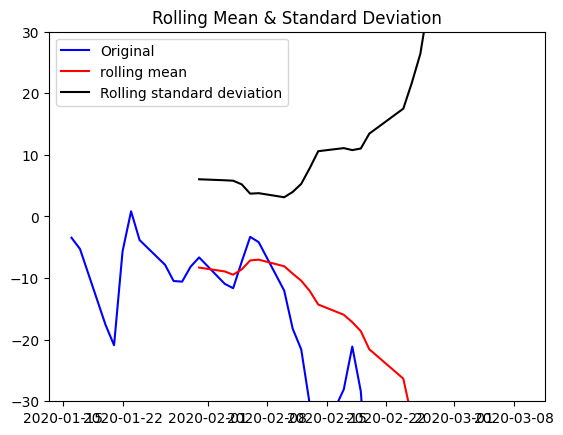

Results of Dickey-Fuller Test:
Test Statistic                  0.855680
p-value                         0.992484
#Lags Used                      3.000000
Number of Observations Used    33.000000
Critical value (1%)            -3.646135
Critical value (5%)            -2.954127
Critical value (10%)           -2.615968
dtype: float64


In [39]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-30,30])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
    
ts_log = train_trend
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [40]:
train_arima = train_trend.dropna()
test_arima = test_trend.dropna()


In [41]:

history = [x for x in train_arima]
y = test_arima

predictions = list()

In [42]:
len(history)

38

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


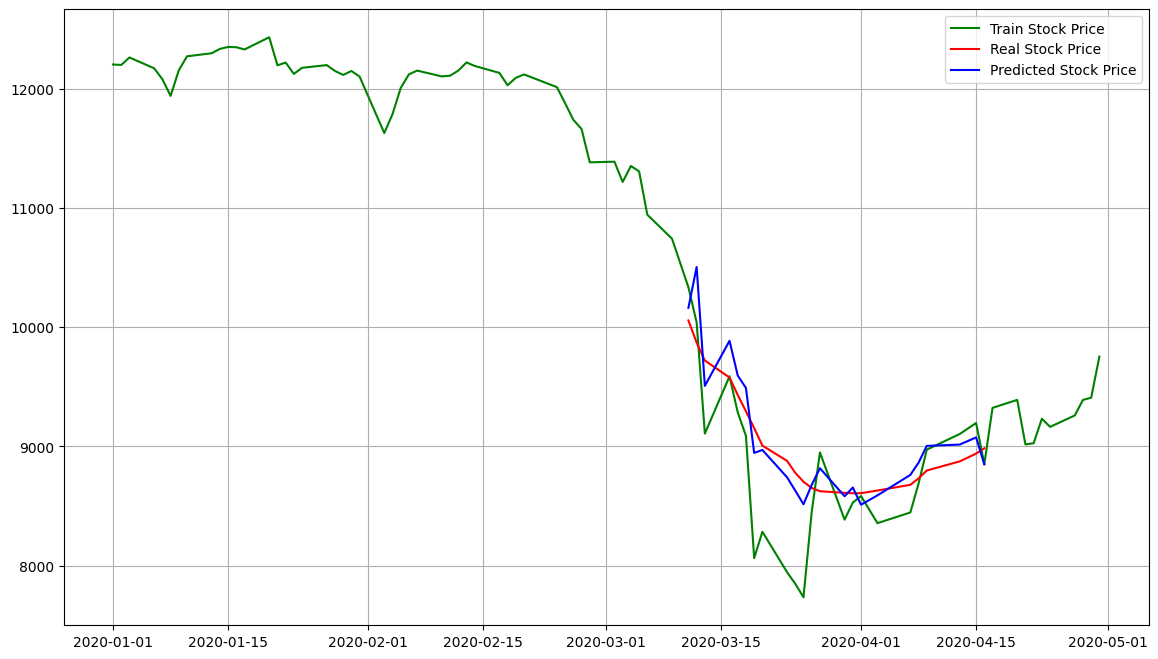

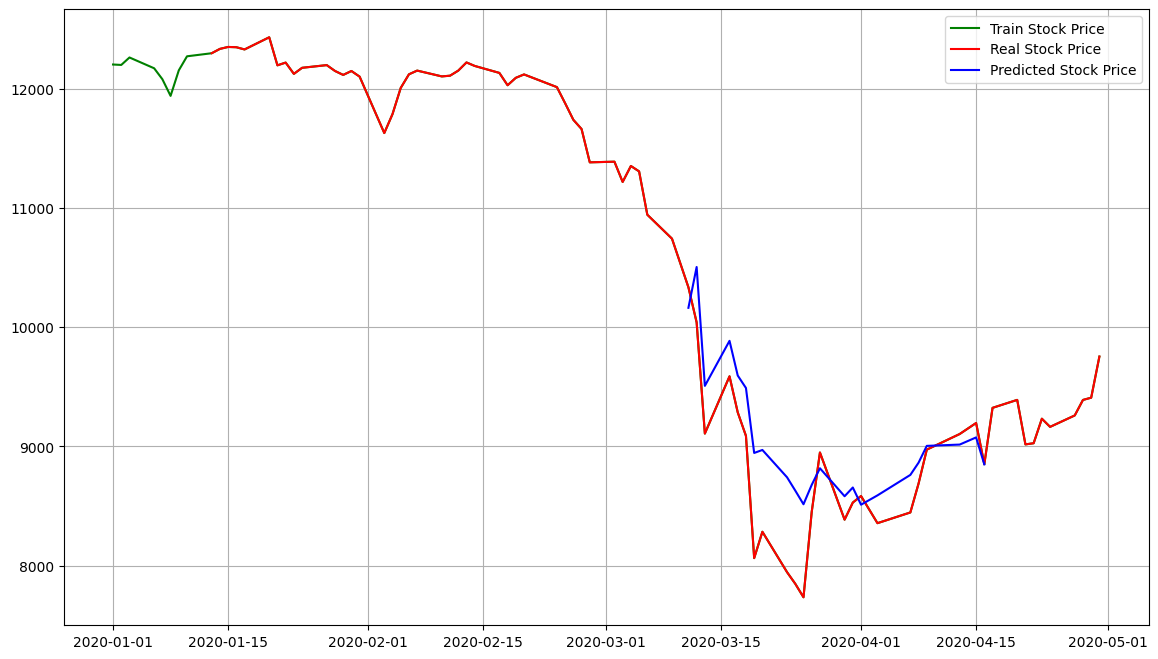

MSE: 39766.05419901821
MAE: 156.72007072516553
RMSE: 199.41427782136918


In [43]:


model_fit = smt.ARIMA(history, order=(1,0,1)).fit()

yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0]+test_sea[0])


for i in range(1, len(y)):
    model_fit =  smt.ARIMA(history, order=(1,0,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat+test_sea[i])
    obs = y[i]
    history.append(obs)

plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(y.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(data.index[-73:], data['Open'].tail(73), color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)

plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

In [44]:
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

In [45]:
from statsmodels.tsa.stattools import adfuller
returns_array_like = [x for l in returns.values for x in l]
_, pvalue, *_ = adfuller(returns_array_like)
print ('pvalue :',pvalue)


pvalue : 0.46092538280145395


In [47]:
arma_mod01 = smt.ARIMA(returns, order=(1,0,2)).fit()
print (arma_mod01.summary())
print ('-------------------------------------')
print (arma_mod01.params)

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:        Log Return Rate   No. Observations:                    7
Model:                 ARIMA(1, 0, 2)   Log Likelihood                  23.280
Date:                Mon, 02 Oct 2023   AIC                            -36.560
Time:                        21:44:51   BIC                            -36.831
Sample:                    01-02-2020   HQIC                           -39.903
                         - 01-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.004     -0.109      0.913      -0.008       0.007
ar.L1          0.1487      3.183      0.047      0.963      -6.089       6.387
ma.L1         -0.5231     52.676     -0.010      0.9

In [48]:
from statsmodels.stats.stattools import jarque_bera
_, jbpv, *_ = jarque_bera(returns.values)
print ('pvalue-->',jbpv)
     

pvalue--> [0.76040354]


In [49]:

from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean

In [50]:

arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
print (res.summary())
print (' ')
print ('The estimated parameters: ')
print ('----------------------------------------')
print (res.params)
     

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.691e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                        Constant Mean - GARCH Model Results                         
Dep. Variable:              Log Return Rate   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                22.7941
Distribution:      Standardized Student's t   AIC:                          -35.5883
Method:                  Maximum Likelihood   BIC:                          -35.8587
                                              No. Observations:                    7
Date:                      Mon, Oct 02 2023   Df Residuals:                        6
Time:                              21:45:42   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [51]:
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
print(mu, theta, omega, alpha, beta)

-0.00043674980685337757 0.1486998477103723 2.925673065877588e-05 0.8193945623378683 1.0562248328053139e-09


In [52]:

sigma_t = res.conditional_volatility.iloc[-1]
sigma_forecast = np.sqrt(omega + alpha * res.resid.iloc[-1] ** 2 + beta * res.conditional_volatility.iloc[-1] ** 2)
epsilon_t = sigma_t * np.random.standard_normal()
epsilon_forecast = sigma_forecast * np.random.standard_normal()
returns_forecast = mu + epsilon_forecast + theta * epsilon_t
returns_forecast

0.004684647441852652

In [53]:

def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool

In [54]:

train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

<Figure size 1400x800 with 0 Axes>

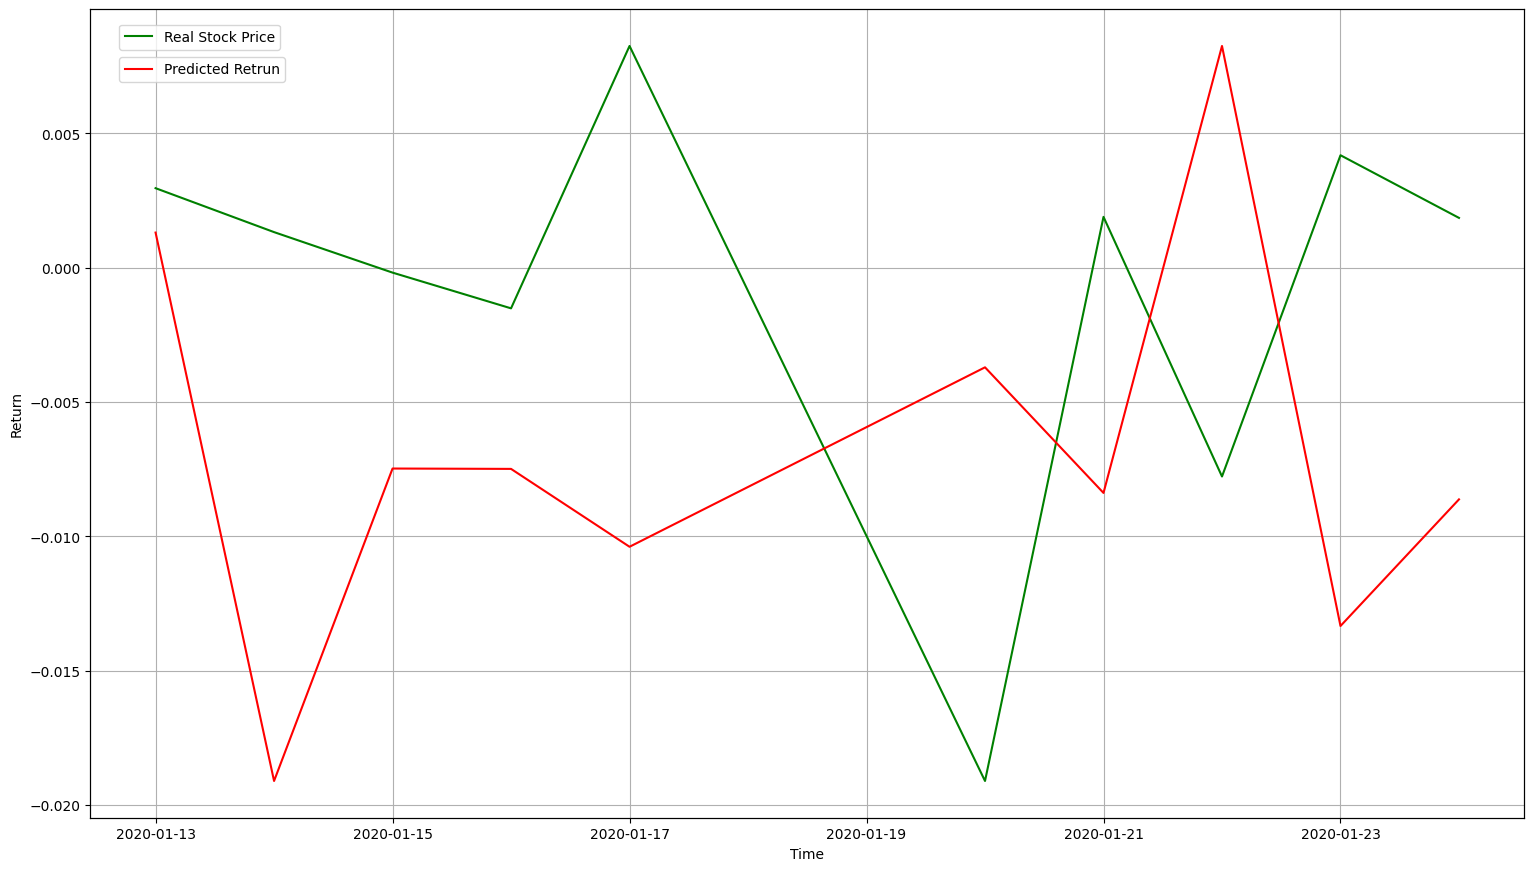

In [55]:

plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ayush\AppData\Local\Programs\Py

<Figure size 1400x800 with 0 Axes>

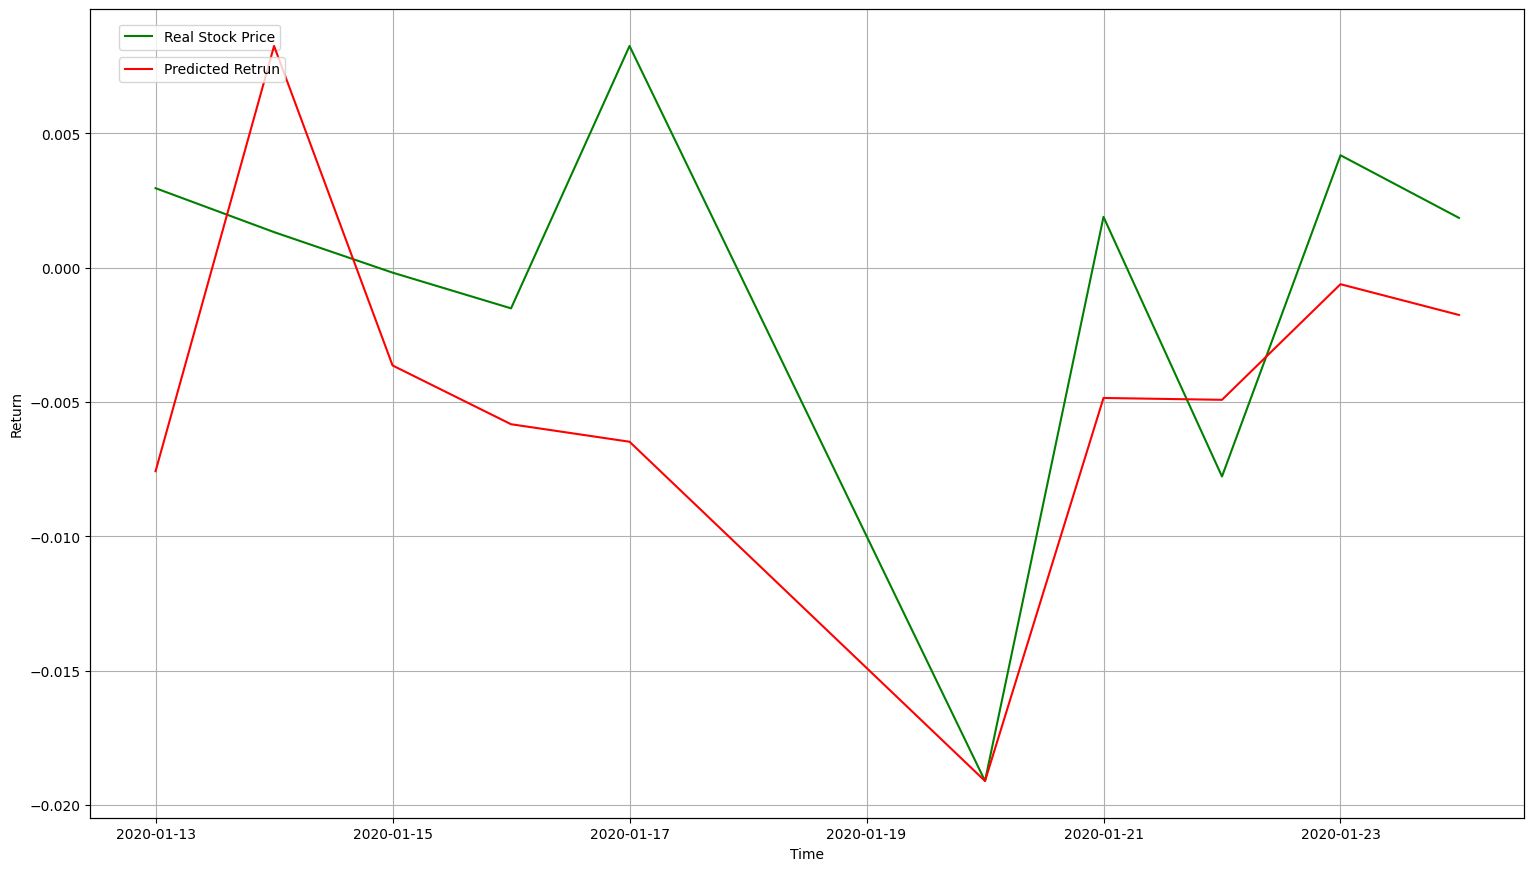

In [15]:


# arma_mod01 = smt.ARIMA(returns, order=(1, 0)).fit()
arma_mod01 = smt.ARIMA(returns, order=(1,0,2)).fit()

arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()

res=arch_mod.fit(update_freq=5, disp='off')

mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]


def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool


train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)


plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')


ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")


ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))